<a href="https://colab.research.google.com/github/Alinka7/NeuralNetworks/blob/main/TrafficSignsClassification_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Binary Traffic Sign Classification

This is our first notebook on neural networks. We will start by building a simple neural network that will help us to classify two types of traffic signs. The signs used in this lesson are a processed subset from the famous German Traffic Sign Recognition Database (GTSRB) that can be downloaded [here]().

In [1]:
!pip install opencv-python

In [2]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

#### Data Loading

Let's now load the data to see what we are dealing with.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


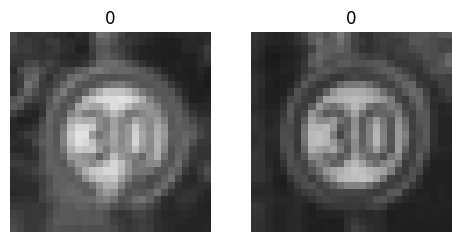

In [10]:
folder = '/content/drive/MyDrive/data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 2)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

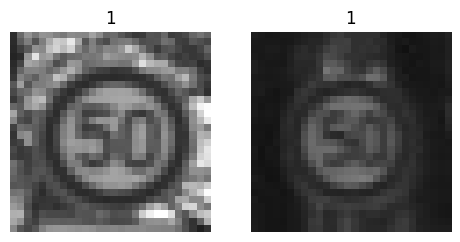

In [11]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 2)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [12]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


#### Prepare Input Data

To train our neural network model, we have to prepare the data to the format the the model actually expects. In our case, this will be numpy arrays.

In [13]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [15]:
labels

array([0, 1, 1, ..., 1, 1, 1])

But now we have a problem. We cannot just feed the image to a neuron since the neuron inputs are flat (one dimensional). On the other hand, the images are 2D matrices. Therefore, we need to "flatten" the images to a one dimensional vector of pixels.

In [16]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)

pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 2.333561897277832


Or, you know, just let make use of our friend numpy :-)

In [18]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.03396177291870117


Before the training, let's again have a look at some raqndom samples from our dataset.

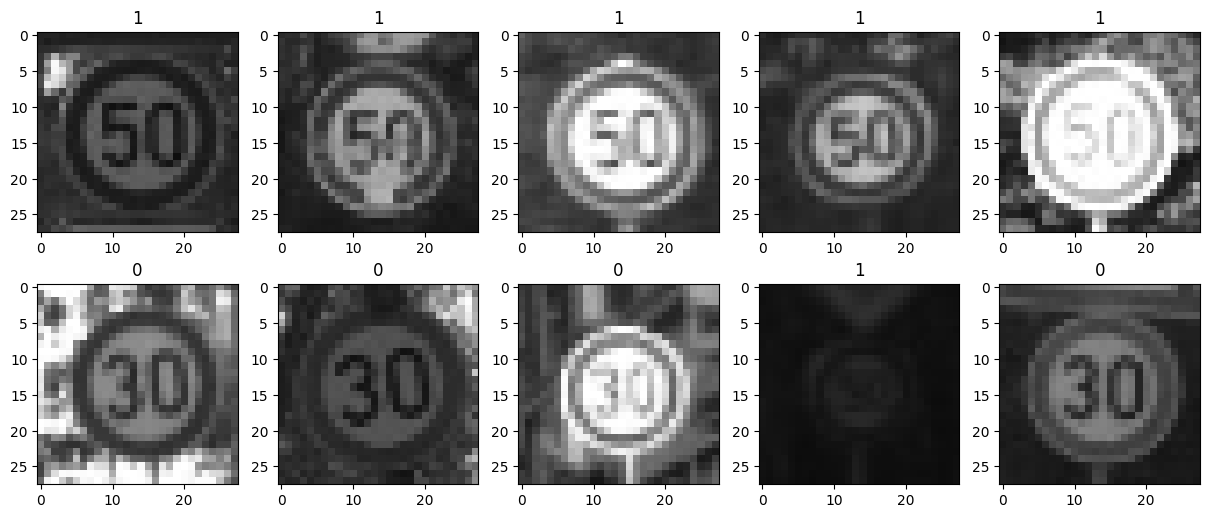

In [19]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Building the Neural Network

Let's now build our first (and yes, very simple) neural network using Tensorflow. For that, we will need a couple of new imports.

In [ ]:
! pip install tensorflow

In [22]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

The following netowork will consist of only one single neuron. It is a very tiny network (not even a network, strictly speaking :-) ) and yet it can be quite powerful.

In [23]:
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


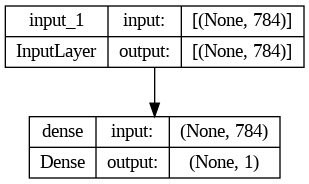

In [24]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

Before starting the training, we have to compile the model. During the compilation, we indicate what optimizer we want to use and what loss should be applied for the minimization process.

In [25]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

And let's train :-)

In [26]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.2984
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.2218
Epoch 3/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1799
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1550
Epoch 5/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1370
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1216
Epoch 7/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1140
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1075
Epoch 9/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1044
Epoch 10/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0954


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

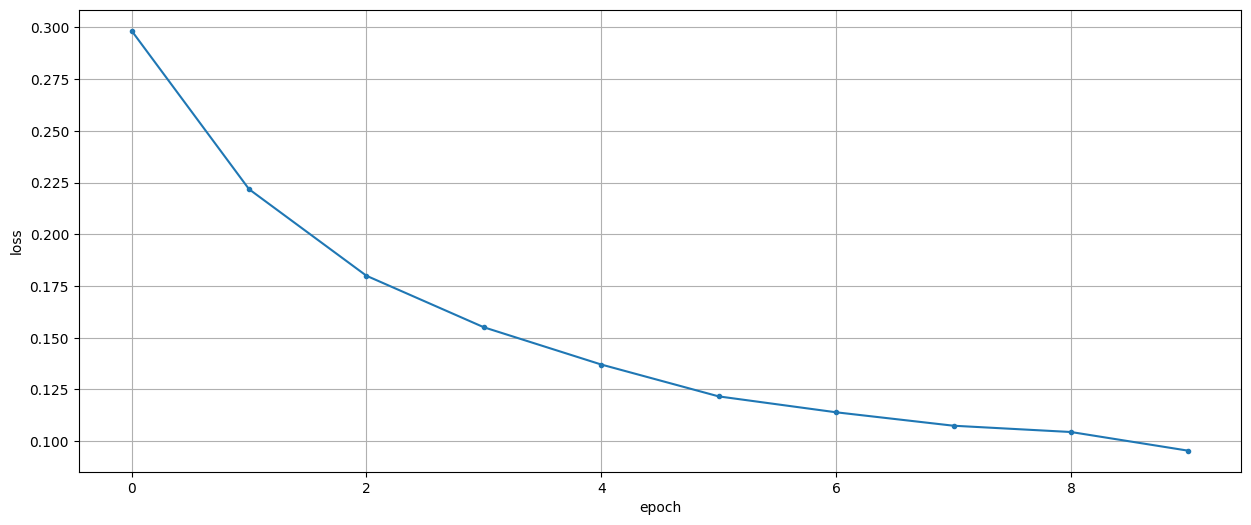

In [27]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.418729] [0.418729]


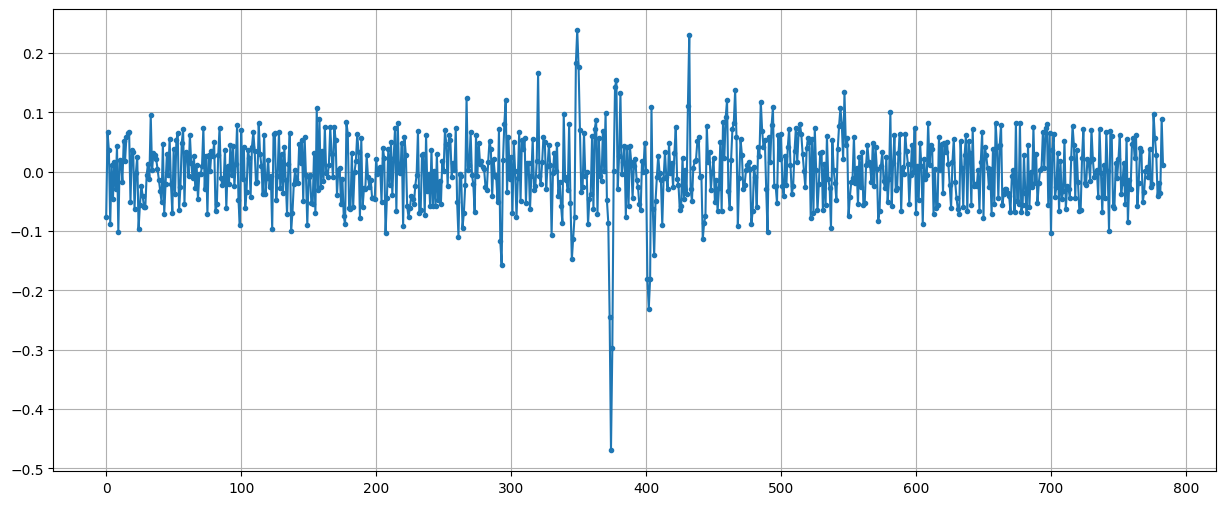

In [28]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

#### Performance Evaluation

Once our model is trained, we will can run it on our images to see how it performs (inference).

In [29]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 72ms/step
[[0.44082418]] 0


In [30]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 1ms/step


In [31]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9199105145413871


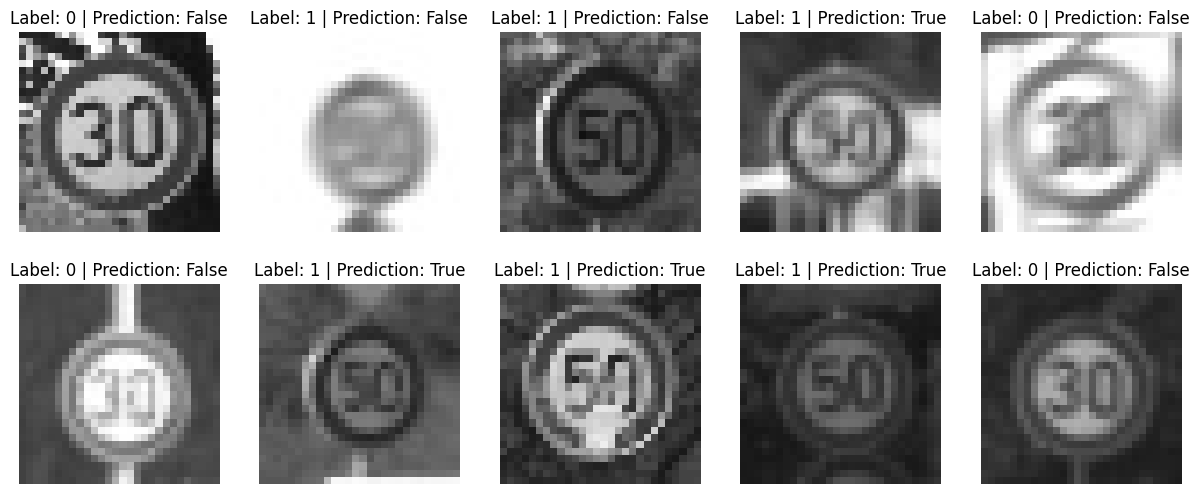

In [32]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

## Testing


### Test 1: adding layers

In [33]:
inputs = Input(shape=(pixels.shape[1]))

outputs = Dense(10, activation="relu")(inputs)
outputs_1 = Dense(10, activation="relu")(outputs)
outputs_2 = Dense(10, activation="relu")(outputs_1)
outputs_3 = Dense(5, activation="relu")(outputs_2)
outputs_4 = Dense(1, activation="sigmoid")(outputs_3)

model = Model(inputs, outputs_4)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 8131 (31.76 KB)
Trainable params: 8131 (31.76

In [34]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy')

Epoch 1/10
140/140 [==============================] - 2s 3ms/step - loss: 0.6886
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.6374
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.5370
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3950
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3004
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.2563
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.2270
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.2187
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1928
Epoch 10/10
140/140 [==============================] - 0s 3ms/step - loss: 0.1701


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

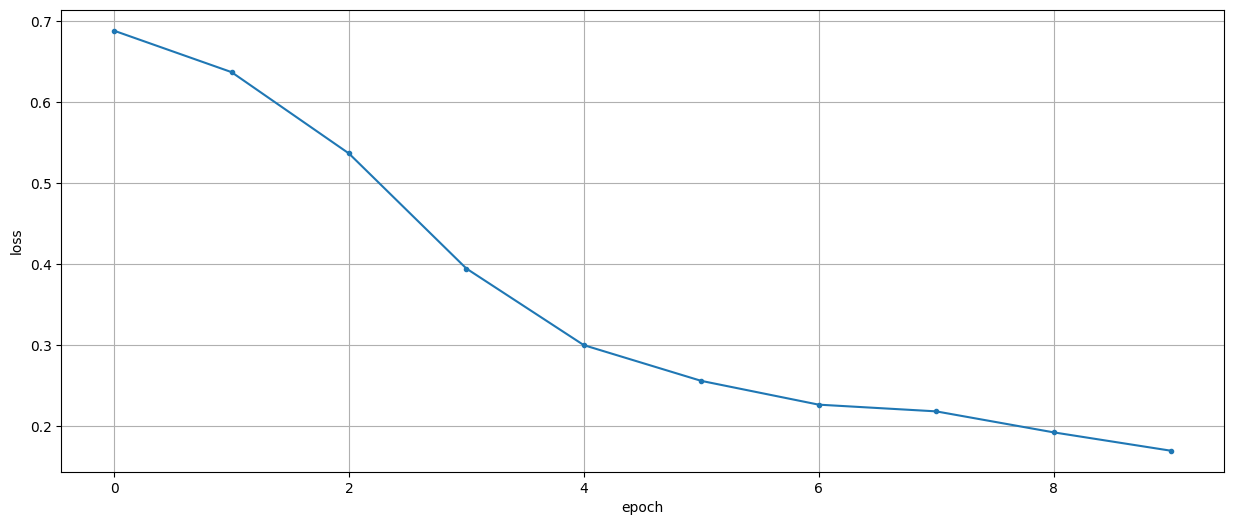

In [35]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[-0.0063861  -0.00708002  0.01441523 -0.00164291 -0.00600334 -0.005619
  0.03725529 -0.00982272 -0.0054425  -0.00485005] [-0.0063861  -0.00708002  0.01441523 -0.00164291 -0.00600334 -0.005619
  0.03725529 -0.00982272 -0.0054425  -0.00485005]


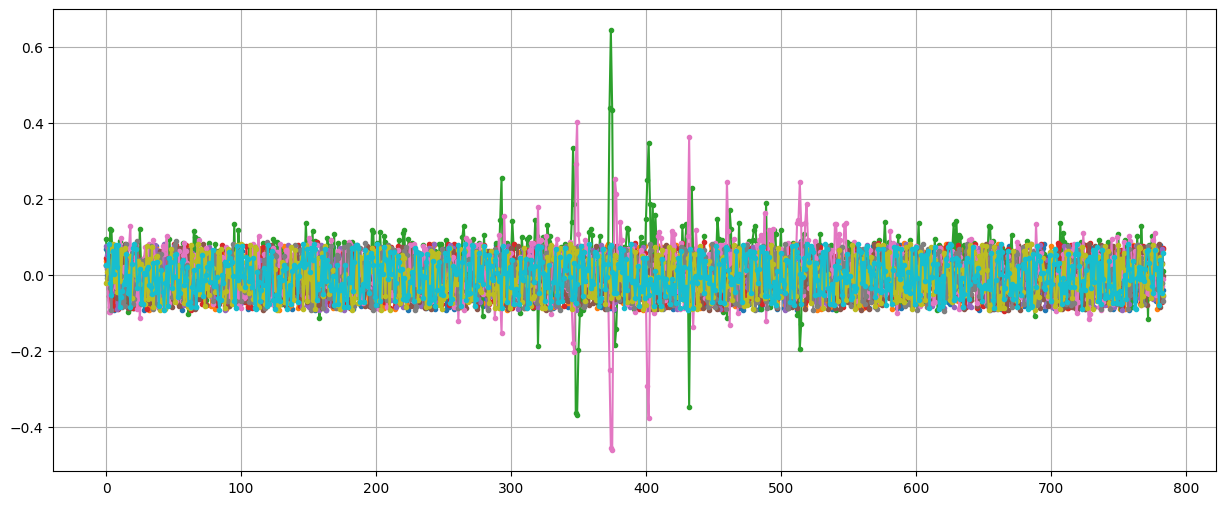

In [36]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [37]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 95ms/step
[[0.06228507]] 0


In [38]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 2ms/step


In [39]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9496644295302014


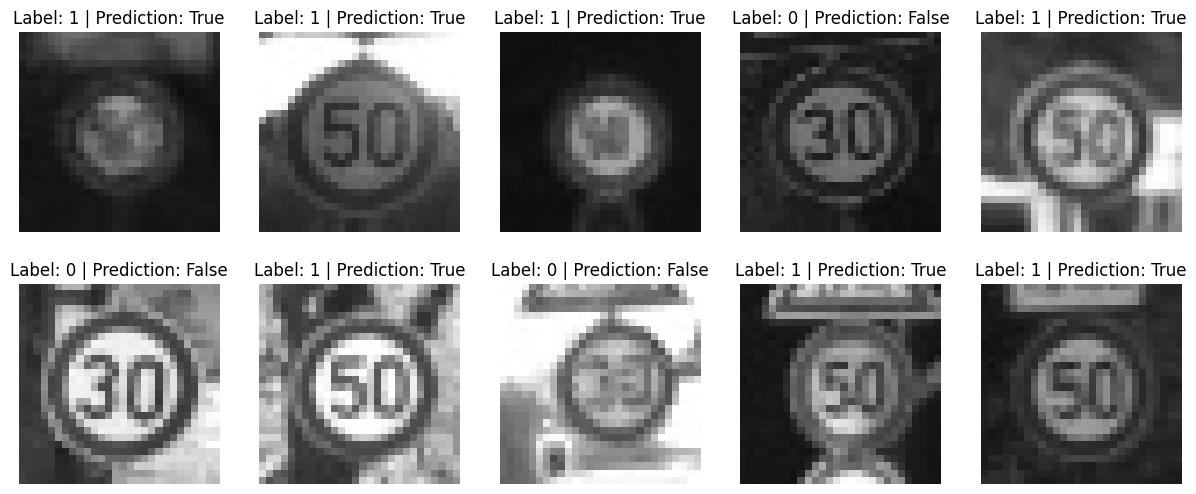

In [40]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

### Test 2: Adding neurons

In [59]:
inputs = Input(shape=(pixels.shape[1]))

outputs = Dense(30, activation="relu")(inputs)
outputs_1 = Dense(30, activation="relu")(outputs)
outputs_2 = Dense(20, activation="relu")(outputs_1)
outputs_3 = Dense(10, activation="relu")(outputs_2)
outputs_4 = Dense(1, activation="sigmoid")(outputs_3)

model = Model(inputs, outputs_4)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_11 (Dense)            (None, 30)                23550     
                                                                 
 dense_12 (Dense)            (None, 30)                930       
                                                                 
 dense_13 (Dense)            (None, 20)                620       
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 25321 (98.91 KB)
Trainable params: 25321 (98.

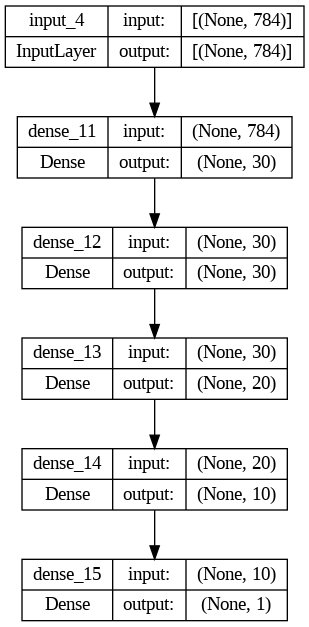

In [60]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [61]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy')

Epoch 1/10
140/140 [==============================] - 2s 2ms/step - loss: 0.6661
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.4417
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.2931
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.2513
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.2116
Epoch 6/10
140/140 [==============================] - 0s 3ms/step - loss: 0.2751
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.2056
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1673
Epoch 10/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1653


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

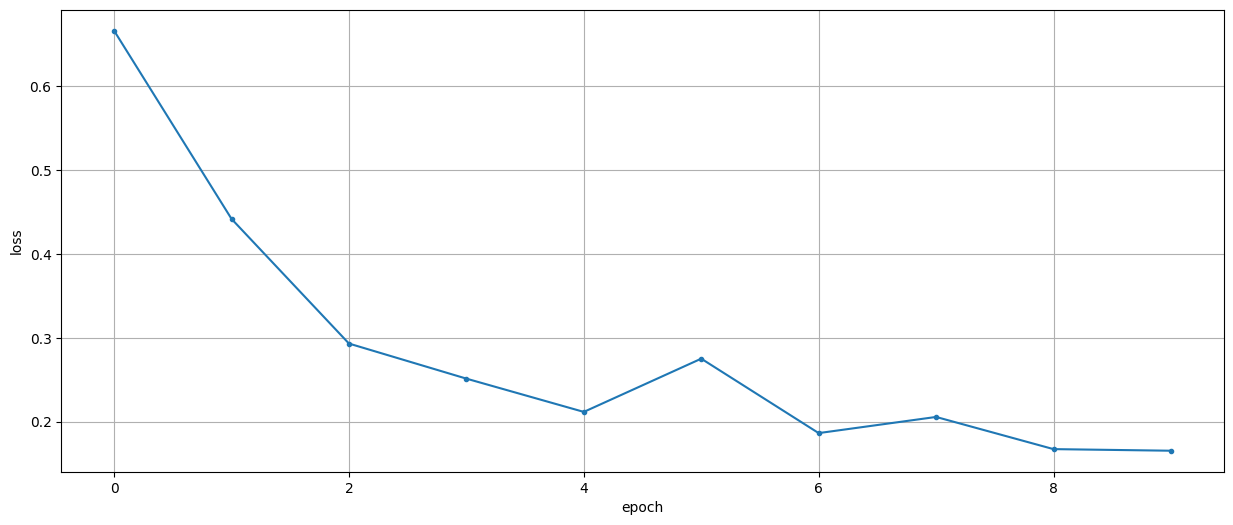

In [62]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [63]:
idx = 16
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 74ms/step
[[0.9950291]] 1


In [64]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

140/140 [==============================] - 0s 2ms/step
Accuracy 0.9682326621923938


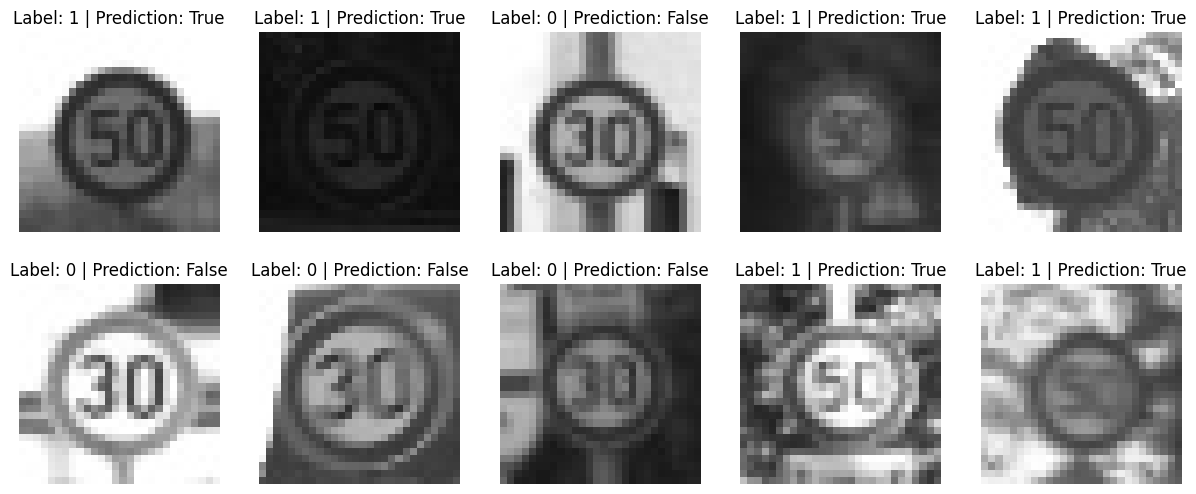

In [65]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

### Test 3: adding epochs

In [66]:
inputs = Input(shape=(pixels.shape[1]))

outputs = Dense(30, activation="relu")(inputs)
outputs_1 = Dense(30, activation="relu")(outputs)
outputs_2 = Dense(20, activation="relu")(outputs_1)
outputs_3 = Dense(10, activation="relu")(outputs_2)
outputs_4 = Dense(1, activation="sigmoid")(outputs_3)

model = Model(inputs, outputs_4)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 30)                23550     
                                                                 
 dense_17 (Dense)            (None, 30)                930       
                                                                 
 dense_18 (Dense)            (None, 20)                620       
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 25321 (98.91 KB)
Trainable params: 25321 (98.

In [69]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy')

Epoch 1/30
140/140 [==============================] - 2s 2ms/step - loss: 0.6505
Epoch 2/30
140/140 [==============================] - 0s 2ms/step - loss: 0.4931
Epoch 3/30
140/140 [==============================] - 0s 3ms/step - loss: 0.3555
Epoch 4/30
140/140 [==============================] - 0s 3ms/step - loss: 0.2518
Epoch 5/30
140/140 [==============================] - 0s 2ms/step - loss: 0.2576
Epoch 6/30
140/140 [==============================] - 0s 3ms/step - loss: 0.2172
Epoch 7/30
140/140 [==============================] - 0s 3ms/step - loss: 0.2060
Epoch 8/30
140/140 [==============================] - 0s 2ms/step - loss: 0.1635
Epoch 9/30
140/140 [==============================] - 0s 3ms/step - loss: 0.1751
Epoch 10/30
140/140 [==============================] - 0s 3ms/step - loss: 0.1499
Epoch 11/30
140/140 [==============================] - 0s 2ms/step - loss: 0.1430
Epoch 12/30
140/140 [==============================] - 0s 3ms/step - loss: 0.1294
Epoch 13/30
140/140 [====

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

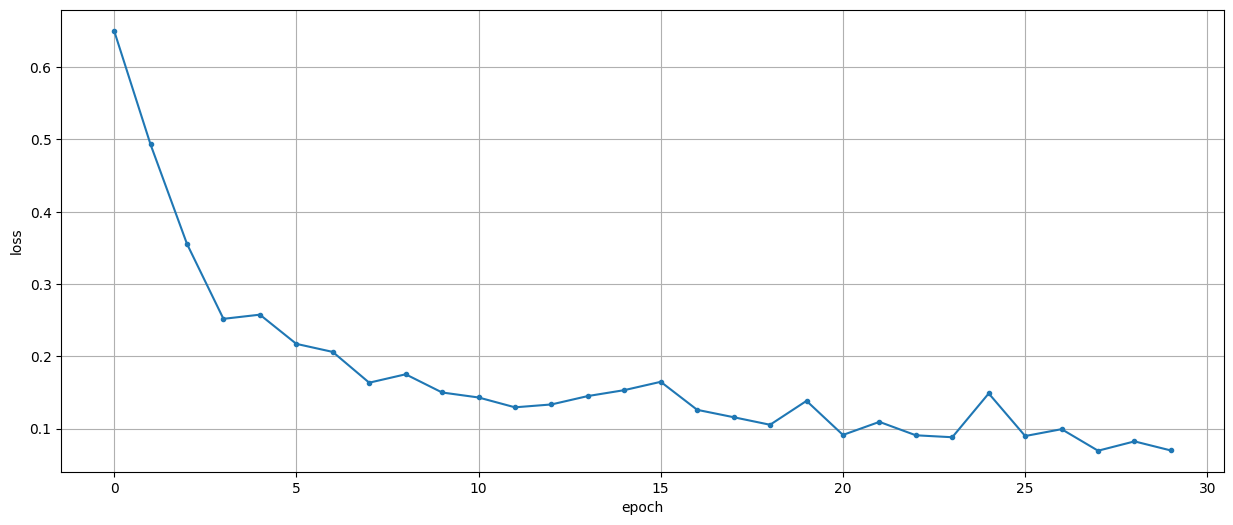

In [70]:
history = model.fit(pixels, labels, epochs=30, batch_size=32)
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [72]:
idx = 35
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 136ms/step
[[0.00414272]] 0


In [73]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 1ms/step


In [74]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9561521252796421


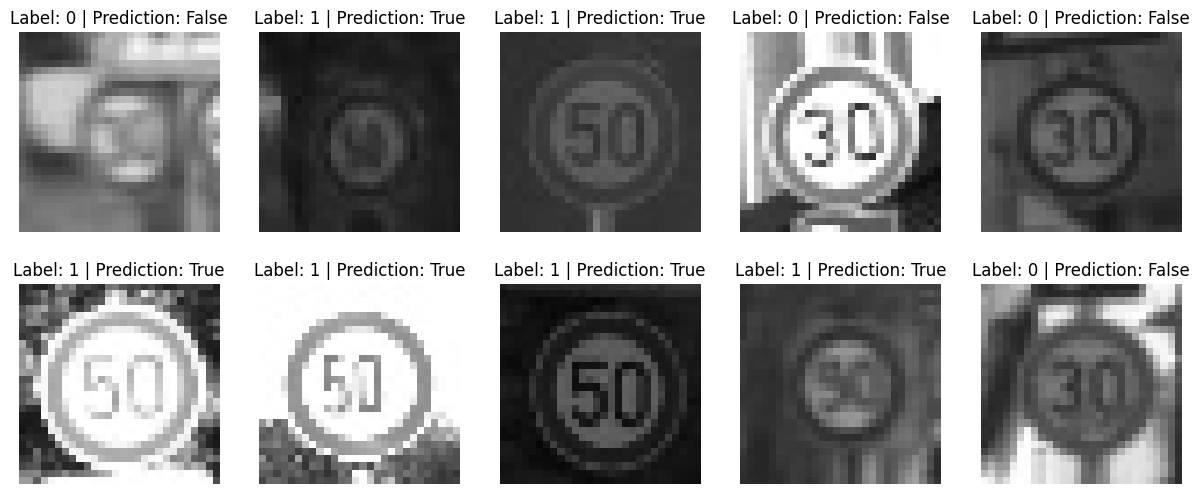

In [75]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

### Test 4: testing optimizer


In [76]:
from keras.optimizers import RMSprop

inputs = Input(shape=(pixels.shape[1]))

outputs = Dense(30, activation="relu")(inputs)
outputs_1 = Dense(30, activation="relu")(outputs)
outputs_2 = Dense(20, activation="relu")(outputs_1)
outputs_3 = Dense(10, activation="relu")(outputs_2)
outputs_4 = Dense(1, activation="sigmoid")(outputs_3)

model = Model(inputs, outputs_4)

model.summary()
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer =optimizer, loss = 'binary_crossentropy')

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_21 (Dense)            (None, 30)                23550     
                                                                 
 dense_22 (Dense)            (None, 30)                930       
                                                                 
 dense_23 (Dense)            (None, 20)                620       
                                                                 
 dense_24 (Dense)            (None, 10)                210       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 25321 (98.91 KB)
Trainable params: 25321 (98.

In [77]:
history = model.fit(pixels, labels, epochs=30, batch_size=32)
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Epoch 1/30
140/140 [==============================] - 2s 4ms/step - loss: 0.6497
Epoch 2/30
140/140 [==============================] - 0s 2ms/step - loss: 0.5806
Epoch 3/30
140/140 [==============================] - 0s 2ms/step - loss: 0.5200
Epoch 4/30
140/140 [==============================] - 0s 2ms/step - loss: 0.4526
Epoch 5/30
140/140 [==============================] - 0s 2ms/step - loss: 0.4247
Epoch 6/30
140/140 [==============================] - 0s 2ms/step - loss: 0.3883
Epoch 7/30
140/140 [==============================] - 0s 2ms/step - loss: 0.3523
Epoch 8/30
140/140 [==============================] - 0s 2ms/step - loss: 0.3352
Epoch 9/30
140/140 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 10/30
140/140 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 11/30
140/140 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 12/30
140/140 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 13/30
140/140 [====

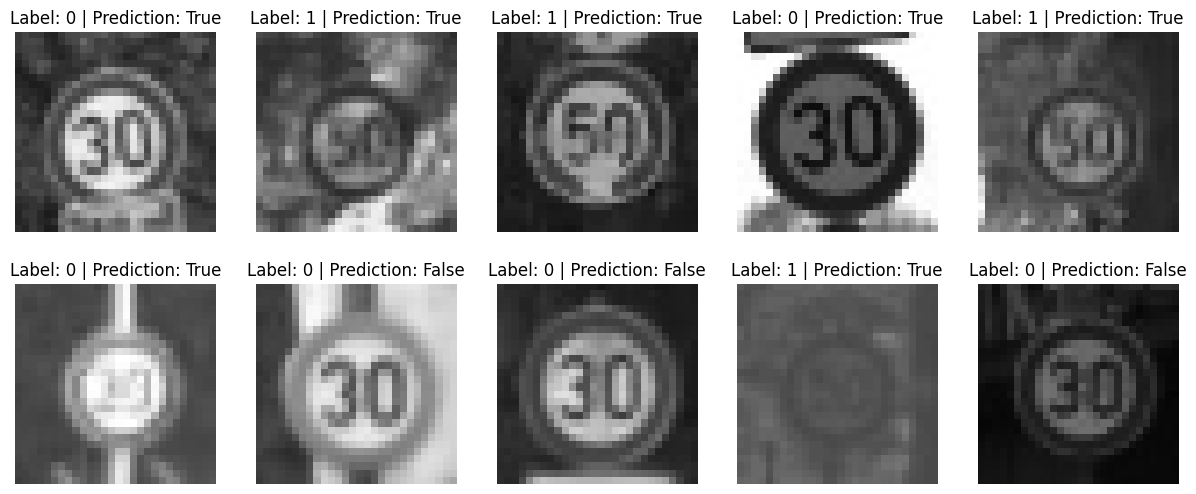

In [79]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

### Testing: adding more layers

In [ ]:
from keras.optimizers import RMSprop

inputs = Input(shape=(pixels.shape[1]))

outputs = Dense(50, activation="relu")(inputs)
outputs_1 = Dense(40, activation="relu")(outputs)
outputs_1 = Dense(30, activation="relu")(outputs)
outputs_1 = Dense(30, activation="relu")(outputs)
outputs_2 = Dense(20, activation="relu")(outputs_1)
outputs_3 = Dense(20, activation="relu")(outputs_2)
outputs_3 = Dense(10, activation="relu")(outputs_2)
outputs_4 = Dense(1, activation="sigmoid")(outputs_3)

model = Model(inputs, outputs_4)

model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
history = model.fit(pixels, labels, epochs=30, batch_size=32)
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

In [82]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9771812080536912


### Testing: leakyRelu

In [83]:
from keras.optimizers import RMSprop

inputs = Input(shape=(pixels.shape[1]))

outputs = Dense(50, activation="LeakyReLU")(inputs)
outputs_1 = Dense(40, activation="LeakyReLU")(outputs)
outputs_1 = Dense(30, activation="LeakyReLU")(outputs)
outputs_1 = Dense(30, activation="LeakyReLU")(outputs)
outputs_2 = Dense(20, activation="LeakyReLU")(outputs_1)
outputs_3 = Dense(20, activation="LeakyReLU")(outputs_2)
outputs_3 = Dense(10, activation="LeakyReLU")(outputs_2)
outputs_4 = Dense(1, activation="sigmoid")(outputs_3)

model = Model(inputs, outputs_4)

model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_34 (Dense)            (None, 50)                39250     
                                                                 
 dense_37 (Dense)            (None, 30)                1530      
                                                                 
 dense_38 (Dense)            (None, 20)                620       
                                                                 
 dense_40 (Dense)            (None, 10)                210       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41621 (162.58 KB)
Trainable params: 41621 (16

In [ ]:
history = model.fit(pixels, labels, epochs=30, batch_size=32)
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

In [85]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9109619686800895


### Testing: ELU


In [92]:
from keras.optimizers import RMSprop

inputs = Input(shape=(pixels.shape[1]))

outputs = Dense(50, activation="elu")(inputs)
outputs_1 = Dense(40, activation="elu")(outputs)
outputs_1 = Dense(30, activation="elu")(outputs)
outputs_1 = Dense(30, activation="elu")(outputs)
outputs_2 = Dense(20, activation="elu")(outputs_1)
outputs_3 = Dense(20, activation="elu")(outputs_2)
outputs_3 = Dense(10, activation="elu")(outputs_2)
outputs_4 = Dense(1, activation="sigmoid")(outputs_3)

model = Model(inputs, outputs_4)

model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_50 (Dense)            (None, 50)                39250     
                                                                 
 dense_53 (Dense)            (None, 30)                1530      
                                                                 
 dense_54 (Dense)            (None, 20)                620       
                                                                 
 dense_56 (Dense)            (None, 10)                210       
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41621 (162.58 KB)
Trainable params: 41621 (16

In [ ]:
history = model.fit(pixels, labels, epochs=30, batch_size=32)
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

In [94]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9944071588366891


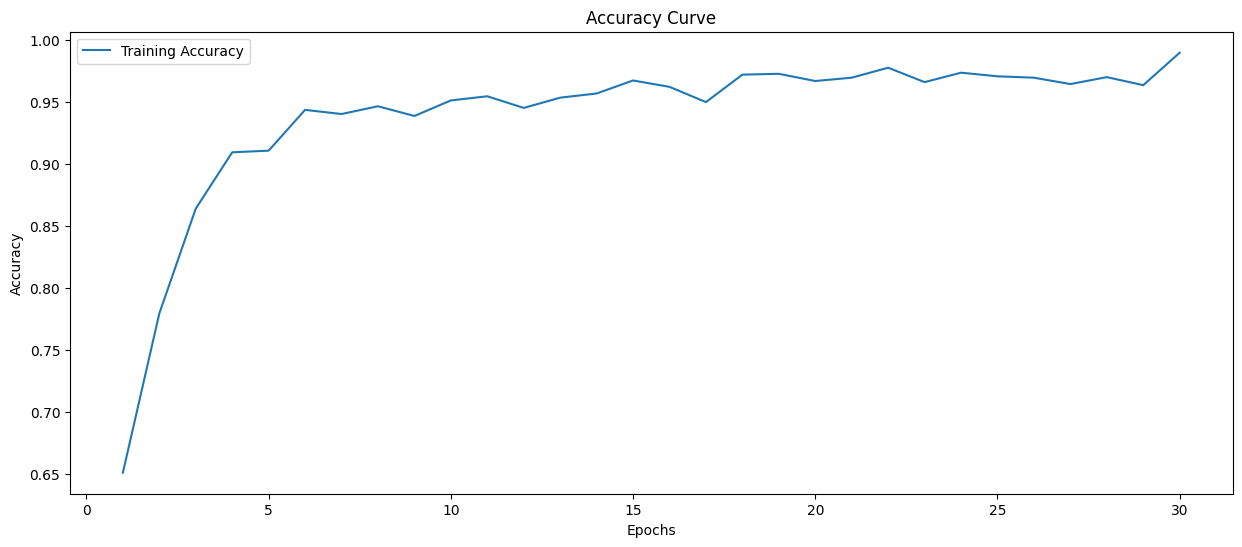

In [96]:
# Отримуємо значення точності на тренуванні
train_accuracy = history.history['accuracy']

# Побудова графіка Accuracy Curve
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()